In [132]:
class Polyomino:
    def __init__(self, cells=None, init_shape_str=None):
        if cells:
            self.cells = cells
            self.max_x = 0
            self.max_y = 0
            for x,y in self.cells:
                self.max_x = max(self.max_x, x)
                self.max_y = max(self.max_y, y)
        elif init_shape_str:
            self.init_str = init_shape_str
            self.cells = set()
            self.max_x = 0
            self.max_y = 0
            y = 0
            for row in self.init_str.split():
                x = 0
                for c in row:
                    if c == 'O':
                        self.cells.add((x,y))
                        self.max_x = max(self.max_x, x)
                        self.max_y = max(self.max_y, y)
                    x += 1
                y += 1
        else:
            raise ValueError

    def rotate90ccw(self):
        rotated = [(y, -x) for (x, y) in self.cells]
        
        min_x = min(x for x, y in rotated)
        min_y = min(y for x, y in rotated)
        
        shifted = [(x - min_x, y - min_y) for (x, y) in rotated]
        
        return Polyomino(cells=set(shifted))

    def reflect(self):
        reflected = [(x, -y) for (x, y) in self.cells]
        
        min_x = min(x for x, y in reflected)
        min_y = min(y for x, y in reflected)
        
        shifted = [(x - min_x, y - min_y) for (x, y) in reflected]
        
        return Polyomino(cells=set(shifted))

    def get_all_unique_transformations(self):
        seen = set()
        for reflect in [False, True]:
            p = self.reflect() if reflect else self
            for _ in range(4):
                key = frozenset(p.cells)
                if key not in seen:
                    seen.add(key)
                    yield p
                p = p.rotate90ccw()

    def __str__(self):
        outmtx = []
        for r in range(self.max_y+1):
            outmtx.append([' ']*(self.max_x+1))
        for x,y in self.cells:
            outmtx[y][x] = 'O'
        outstr = ""
        for r in outmtx:
            outstr += ''.join(r) + '\n'
        return outstr[:-1]
            

    def __repr__(self):
        return self.__str__()
            

In [133]:
class PolyominoBoardPlacement:
    def __init__(self, polyomino, board, x, y):
        if not board.can_place(x,y,polyomino):
            raise ValueError
        self.polyomino = polyomino
        self.board = board
        self.x = x
        self.y = y
        self.absolute_cells = set()
        for px,py in polyomino.cells:
            self.absolute_cells.add((x+px, y+py))
        self.index = None # used later for indexing this placement in the incidence matrix

    def __str__(self):
        boardcopy = deepcopy(self.board.board)
        for x,y in self.absolute_cells:
            boardcopy[y][x] = 'O'
        out = ""
        for row in boardcopy:
            out += ' '.join(row) + '\n'
        return out
            

    def __repr__(self):
        return self.__str__()

In [134]:
from copy import deepcopy
from typing import List, Dict
class Board:
    def __init__(self, month=None, day=None):
        self.board = [
            [' ',' ',' ',' ',' ',' ','X'],
            [' ',' ',' ',' ',' ',' ','X'],
            [' ',' ',' ',' ',' ',' ',' '],
            [' ',' ',' ',' ',' ',' ',' '],
            [' ',' ',' ',' ',' ',' ',' '],
            [' ',' ',' ',' ',' ',' ',' '],
            ['X','X',' ',' ',' ','X','X'],
        ]
        self.max_x_idx = len(self.board[0]) - 1
        self.max_y_idx = len(self.board) - 1
        if month and day:
            self.board[(month-1)//6][(month-1)%6] = 'X'
            if day < 29:
                self.board[2+((day-1)//7)][(day-1)%7] = 'X'
            else:
                self.board[6][day-27] = 'X'

    # Checks if a polyomino in a given orientation can be placed with it's (0,0) cell on 
    # x,y on the board
    def can_place(self, x, y, polyomino):
        for px,py in polyomino.cells:
            ppx = x+px
            ppy = y+py
            if ppx > self.max_x_idx or ppy > self.max_y_idx:
                return False
            if self.board[ppy][ppx] == 'X':
                return False
        return True

    def get_all_valid_placements(self, polys: List[Polyomino]) -> Dict[Polyomino, List[PolyominoBoardPlacement]]:
        out = {}
        for p in polys:
            for pt in p.get_all_unique_transformations():
                placements = []
                for x in range(self.max_x_idx+1):
                    for y in range(self.max_y_idx+1):
                        if self.can_place(x,y,pt):
                            placements.append(PolyominoBoardPlacement(pt,self,x,y))
                if p in out:
                    out[p] += placements
                else:
                    out[p] = placements
        return out
                
    
    def __str__(self):
        out = ""
        for row in self.board:
            out += ' '.join(row) + '\n'
        return out

    def __repr__(self):
        return self.__str__()
            

In [135]:
board = Board()
board

            X
            X
             
             
             
             
X X       X X

In [137]:
shortL ="""
OOO
O
"""
Z ="""
OO
.OO
"""
longL ="""
OOOO
O
"""
T ="""
OOO
.O
"""
plus ="""
.O
OOO
.O
"""
cup ="""
OOO
O.O
"""
bigZ ="""
OO
.O
.OO
"""
square ="""
OO
OO
"""
fatL ="""
OOO
OO
"""

In [138]:
allpolystrs = [shortL,Z,longL,T,plus,cup,bigZ,square,fatL]

In [139]:
allpolys = [Polyomino(init_shape_str=s) for s in allpolystrs]

In [140]:
all_valid_placements = board.get_all_valid_placements(allpolys)

In [141]:
sum(len(pms) for pms in all_valid_placements.values())

989

In [142]:
for p in all_valid_placements:
    print(p)
    print("----")
    for pm in all_valid_placements[p]:
        print(pm)
        print("")

OOO
O  
----
O O O       X
O           X
             
             
             
             
X X       X X


            X
O O O       X
O            
             
             
             
X X       X X


            X
            X
O O O        
O            
             
             
X X       X X


            X
            X
             
O O O        
O            
             
X X       X X


            X
            X
             
             
O O O        
O            
X X       X X


  O O O     X
  O         X
             
             
             
             
X X       X X


            X
  O O O     X
  O          
             
             
             
X X       X X


            X
            X
  O O O      
  O          
             
             
X X       X X


            X
            X
             
  O O O      
  O          
             
X X       X X


            X
            X
             
             
  O O O      
  O          
X X

In [144]:
# Given all the polyomino placements for the same board, generates the
# Incidence matrix representation for solving the exact cover problem 
# https://en.wikipedia.org/wiki/Exact_cover#Incidence_matrix
# That is, for example with a board of 41 cells, 9 polyominos, with 800 possible placements total
# Returns an 800 x 41 matrix (800 x 50 if encoding the "at most 1" constraint)
# Each row represents the placement of 1 polyomino, with 1's set in columns that affects
# The first 41 columns represent a specific cell being occupied, the last 9 represent a specific polyomino being used
# also returns: 
# idx_to_placement: converts specific row index to it's corresponding original Placement object
# date_to_col: converts a month or day to it's corresponding column index
# poly_is: converts a polyomino of one type to all the indices that are placements of that polyomino (incl. transformations) 
import numpy as np
def make_incidence_matrix(all_polyomino_placements, encode_atmost1_constraint=False):
    polys = list(all_polyomino_placements.keys())
    board = all_polyomino_placements[polys[0]][0].board
    cell_to_col = {}
    date_to_col = {"month":{}, "day":{}}
    j = 0
    for y in range(board.max_y_idx + 1):
        for x in range(board.max_x_idx + 1):
            if board.board[y][x] != 'X':
                cell_to_col[(x,y)] = j
                if y < 2:
                    date_to_col["month"][(y*6)+x+1] = j
                elif y < 6:
                    date_to_col["day"][((y-2)*7)+x+1] = j
                else:
                    date_to_col["day"][((y-2)*7)+x-1] = j
                j += 1
    n_cells = len(cell_to_col) # always 43 for our board
    n_polys = len(polys) # always 9 for our polyominos
    n_placements = sum(len(pms) for pms in all_valid_placements.values()) # varies based on the day's board
    
    inc_mtx = np.zeros((n_placements,n_cells+(n_polys if encode_atmost1_constraint else 0)))
    idx_to_placement = {}
    
    i = 0 # row / placement index
    poly_j = n_cells # col / "use poly exactly once" constraint index
    poly_is = {}
    for poly in polys:
        placements = all_polyomino_placements[poly]
        for placement in placements:
            idx_to_placement[i] = placement
            if poly not in poly_is:
                poly_is[poly] = []
            poly_is[poly].append(i)
            for cell in placement.absolute_cells:
                j = cell_to_col[cell]
                inc_mtx[i,j] = 1 # set each cell occupied
            if encode_atmost1_constraint:
                inc_mtx[i,poly_j] = 1 # set the polyomino's used
            i += 1
        poly_j += 1
    return inc_mtx, idx_to_placement, date_to_col, poly_is
    

In [145]:
enc_atmost1 = True
inc_mtx, idx_to_placement, date_to_col, poly_is = make_incidence_matrix(all_valid_placements, encode_atmost1_constraint = enc_atmost1)
inc_mtx.shape

(989, 52)

In [146]:
from z3 import *

In [147]:
def solve_for_date(day, month, atmost1_encoded=False):
    solver = Solver()
    
    placement_bools = [Bool(f"p_{i}") for i in range(inc_mtx.shape[0])]
    
    month_col_idx = date_to_col["month"][month]
    day_col_idx = date_to_col["day"][day]

    if not atmost1_encoded:
        for poly, idxs in poly_is.items():
            poly_bools = [placement_bools[i] for i in idxs]
            solver.add(PbEq([(v, 1) for v in poly_bools], 1))
    
    for j in range(inc_mtx.shape[1]):
        placement_idxs = np.argwhere(inc_mtx[:,j]).flatten()
        covering_bools = [placement_bools[i] for i in placement_idxs] # convert indices to actual z3 Bool expressions
        cell_is_today = (j == day_col_idx) or (j == month_col_idx) 
        solver.add(PbEq([(v, 1) for v in covering_bools], 0 if cell_is_today else 1))

    if solver.check() == sat:
        model = solver.model()
        used = [i for i, v in enumerate(placement_bools) if model.eval(v)]
        return [idx_to_placement[i] for i in used]
    else:
        print("No solution.")

In [150]:
import datetime
today = datetime.datetime.today()
print(today.date())
solve_for_date(today.day, today.month, enc_atmost1)

2025-05-16


[            X
             X
           O O
             O
             O
              
 X X       X X,
           O X
         O O X
         O    
              
              
              
 X X       X X,
             X
             X
 O            
 O            
 O            
 O O          
 X X       X X,
       O     X
     O O     X
       O      
              
              
              
 X X       X X,
             X
             X
              
       O      
     O O O    
       O      
 X X       X X,
             X
             X
              
              
              
     O   O    
 X X O O O X X,
             X
             X
              
         O O  
           O  
           O O
 X X       X X,
             X
             X
   O O        
   O O        
              
              
 X X       X X,
 O O O       X
 O O         X
              
              
              
              
 X X       X X]

In [64]:
def all_solutions_for_date(day, month, atmost1_encoded=False):
    solver = Solver()
    
    placement_bools = [Bool(f"p_{i}") for i in range(inc_mtx.shape[0])]
    
    month_col_idx = date_to_col["month"][month]
    day_col_idx = date_to_col["day"][day]

    if not atmost1_encoded:
        for poly, idxs in poly_is.items():
            poly_bools = [placement_bools[i] for i in idxs]
            solver.add(PbEq([(v, 1) for v in poly_bools], 1))
    
    for j in range(inc_mtx.shape[1]):
        placement_idxs = np.argwhere(inc_mtx[:,j]).flatten()
        covering_bools = [placement_bools[i] for i in placement_idxs] # convert indices to actual z3 Bool expressions
        cell_is_today = (j == day_col_idx) or (j == month_col_idx) 
        solver.add(PbEq([(v, 1) for v in covering_bools], 0 if cell_is_today else 1))

    all_solns = []
    while solver.check() == sat:
        model = solver.model()
        used = [i for i, v in enumerate(placement_bools) if model.eval(v)]
        all_solns.append([idx_to_placement[i] for i in used])

        not_last_soln = Or([v != solver.model()[v] for v in placement_bools])
        solver.add(not_last_soln)
    return all_solns

In [65]:
all = all_solutions_for_date(today.day, today.month, enc_atmost1)

In [66]:
len(all)

19

In [68]:
start_date = datetime.date(2028,1,1)
day_count = 366
all_dates = list(start_date + datetime.timedelta(n) for n in range(day_count))
all_solutions = []
import time as t
full_st = t.time()
for date in all_dates:
    st = t.time()
    all = all_solutions_for_date(date.day, date.month, enc_atmost1)
    dur = t.time()-st
    all_solutions.append(all)
    print(date,len(all),f"{dur:.2f}s")
el = full_st-t.time()
print(f"Finished in {int(el // 60)}m {int(el % 60)}s")

2028-01-01 315 41.24s
2028-01-02 118 13.93s
2028-01-03 198 24.46s
2028-01-04 121 15.02s
2028-01-05 202 22.84s
2028-01-06 93 10.14s
2028-01-07 506 68.79s
2028-01-08 183 20.92s
2028-01-09 194 24.44s
2028-01-10 130 15.78s
2028-01-11 259 31.03s
2028-01-12 147 18.82s
2028-01-13 170 22.39s
2028-01-14 312 38.21s
2028-01-15 100 12.32s
2028-01-16 205 25.90s
2028-01-17 126 16.27s
2028-01-18 202 24.10s
2028-01-19 109 13.10s
2028-01-20 239 29.02s
2028-01-21 105 13.01s
2028-01-22 582 77.57s
2028-01-23 94 11.98s
2028-01-24 102 11.85s
2028-01-25 143 17.88s
2028-01-26 145 16.79s
2028-01-27 149 17.59s
2028-01-28 734 99.64s
2028-01-29 256 33.62s
2028-01-30 347 42.18s
2028-01-31 312 41.74s
2028-02-01 119 13.19s
2028-02-02 73 8.88s
2028-02-03 80 9.40s
2028-02-04 41 5.60s
2028-02-05 47 5.65s
2028-02-06 25 2.97s
2028-02-07 229 27.23s
2028-02-08 93 11.34s
2028-02-09 38 5.32s
2028-02-10 76 9.15s
2028-02-11 54 6.73s
2028-02-12 53 7.06s
2028-02-13 67 8.50s
2028-02-14 96 12.25s
2028-02-15 21 3.26s
2028-02-16 54 

In [80]:
all_solutions_lens = np.array(list(map(len,all_solutions)))

In [81]:
max(all_solutions_lens),all_dates[np.argmax(all_solutions_lens)]

(734, datetime.date(2028, 1, 28))

In [82]:
min(all_solutions_lens),all_dates[np.argmin(all_solutions_lens)]

(11, datetime.date(2028, 5, 21))

In [83]:
np.mean(all_solutions_lens)

109.8879781420765

In [86]:
import matplotlib.pyplot as plt

(array([94., 92., 67., 32., 30., 19., 14.,  2.,  5.,  2.,  2.,  1.,  1.,
         2.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([ 11.  ,  47.15,  83.3 , 119.45, 155.6 , 191.75, 227.9 , 264.05,
        300.2 , 336.35, 372.5 , 408.65, 444.8 , 480.95, 517.1 , 553.25,
        589.4 , 625.55, 661.7 , 697.85, 734.  ]),
 <BarContainer object of 20 artists>)

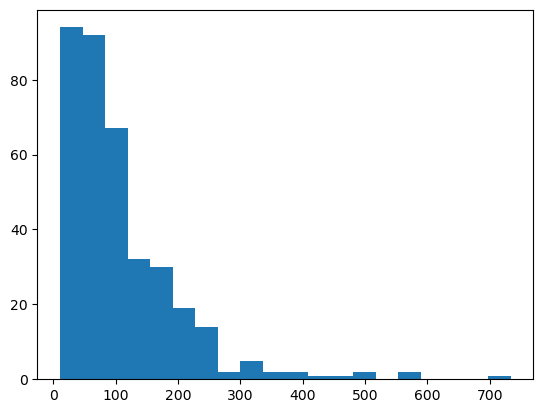

In [121]:
plt.hist(all_solutions_lens, 20)

(array([ 2.,  2.,  3.,  9., 17., 25., 36., 35., 25., 44., 44., 30., 22.,
        33., 19.,  9.,  3.,  3.,  4.,  1.]),
 array([2.39789527, 2.60792596, 2.81795665, 3.02798734, 3.23801802,
        3.44804871, 3.6580794 , 3.86811009, 4.07814078, 4.28817146,
        4.49820215, 4.70823284, 4.91826353, 5.12829421, 5.3383249 ,
        5.54835559, 5.75838628, 5.96841697, 6.17844765, 6.38847834,
        6.59850903]),
 <BarContainer object of 20 artists>)

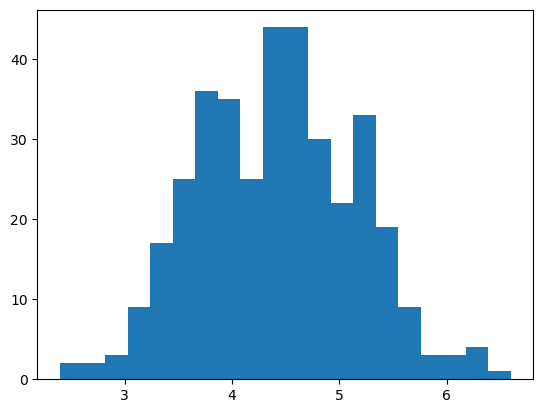

In [122]:
plt.hist(np.log(all_solutions_lens), 20)

In [91]:
import pandas as pd

In [128]:
logn = np.log(all_solutions_lens)
df = pd.DataFrame({
    "n_solutions":all_solutions_lens,
    "log_n_solutions":logn,
    "log_n_standardized":(logn-np.mean(logn))/np.std(logn)
},index=pd.to_datetime(all_dates))

In [131]:
df

,n_solutions,log_n_solutions,log_n_standardized
2028-01-01,315,5.752573,1.804200
2028-01-02,118,4.770685,0.473104
2028-01-03,198,5.288267,1.174764
2028-01-04,121,4.795791,0.507139
2028-01-05,202,5.308268,1.201878
...,...,...,...
2028-12-27,74,4.304065,-0.159469
2028-12-28,140,4.941642,0.704863
2028-12-29,166,5.111988,0.935791
2028-12-30,91,4.510860,0.120872


In [129]:
df.to_csv("solutions.csv")

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


(<Figure size 1250x170 with 2 Axes>,
 array([<Axes: ylabel='2028'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


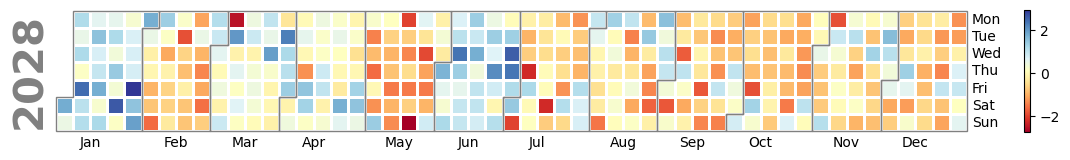

In [130]:
import calplot
calplot.calplot(df['log_n_standardized'], cmap='RdYlBu')